This script is used to plot data/DDM fits and conduct model comparison for the DDM fits.

Produces Figures 2a-d and the fit indicies for Table 1.

In [1]:
imatlab_export_fig('print-svg')
set(0,'defaultfigurecolor',[1 1 1])
set(groot,'DefaultAxesFontName','Arial')

% read in data
GFIT_DIR = '../FitGDDM/fits';
GFIT_DATA_DIR = '../FItGDDM/data';
models_block = readtable('model_info_block.csv','ReadVariableNames',true,'Delimiter',',');

%% load in fit data
models_pc = readtable('model_info_precue.csv','Delimiter',',');
models_pt = readtable('model_info_pretone.csv','Delimiter',',');


%for display
set(groot,'defaultBarFaceAlpha',0.54)
psych_leg={'low','neutral','high'};
psych_color={'b','k','r'};
jet11 = mat2cell(jet(11),ones(1,11));
jet4 = jet11([2,5,9,11]);
jet4{3} = [128,38,38]./255; %make HL duller red
jet4{2} = [145,13,255]./255; %make LH purply
jet4r = flipud(jet4);
mline_style = '-';

# Plot fits and data for each condition

> In read_data_csv (line 16)
> In read_data_csv (line 17)


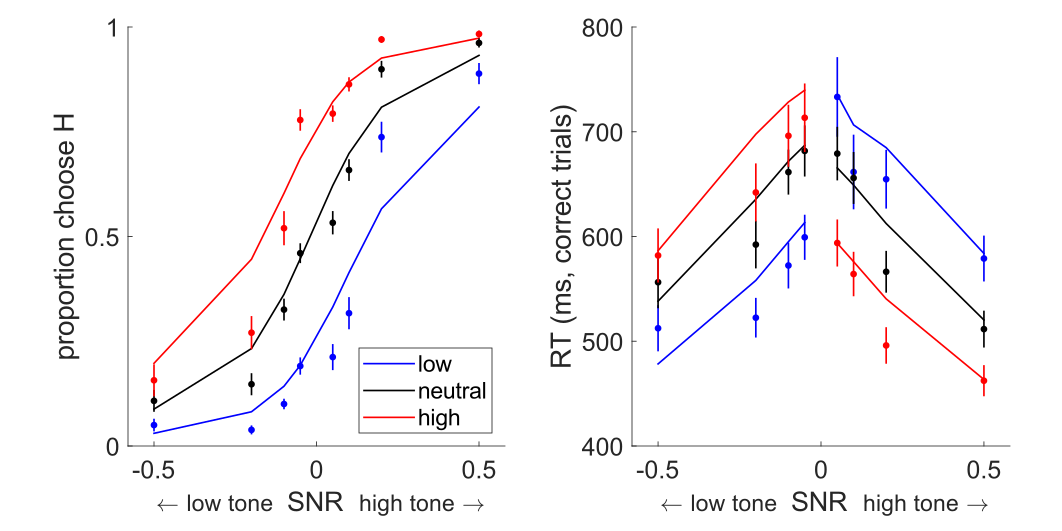

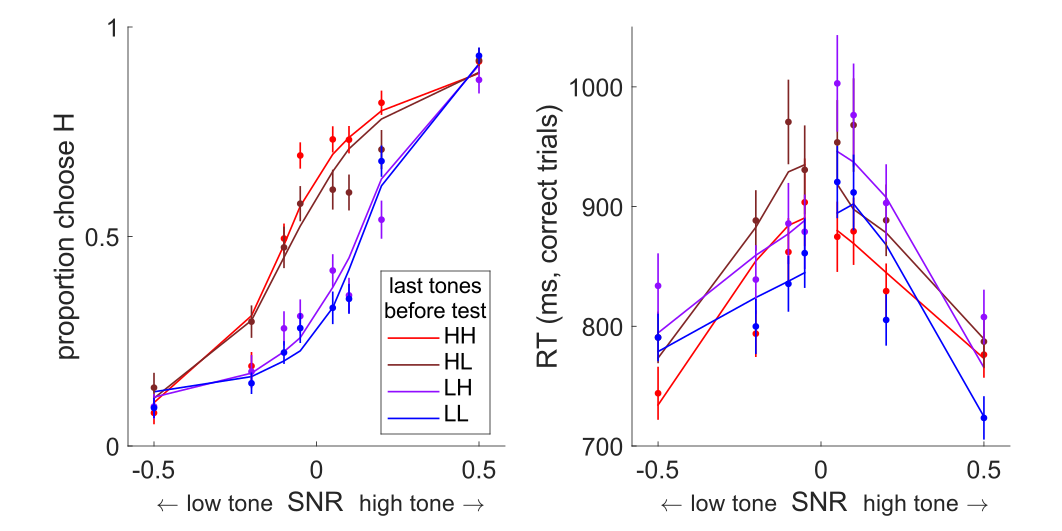

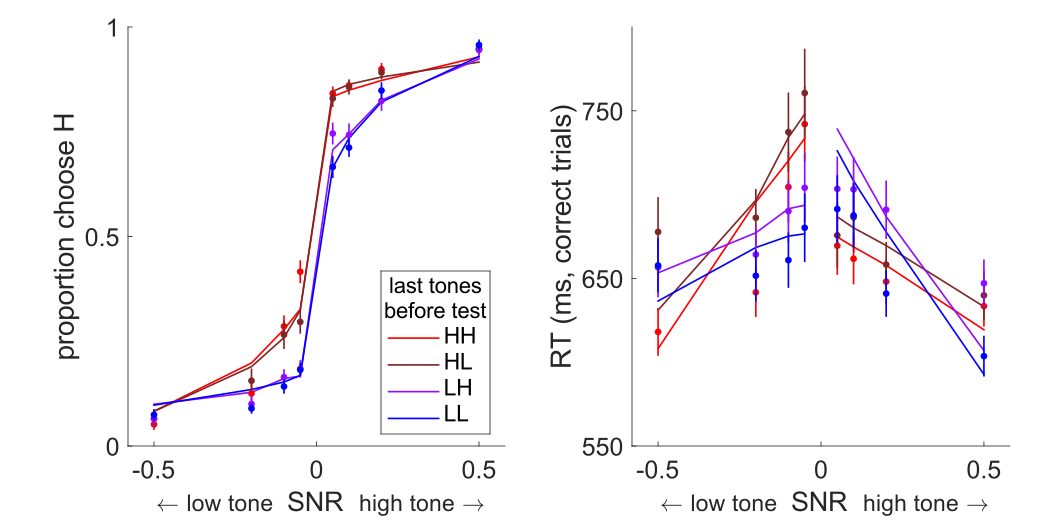

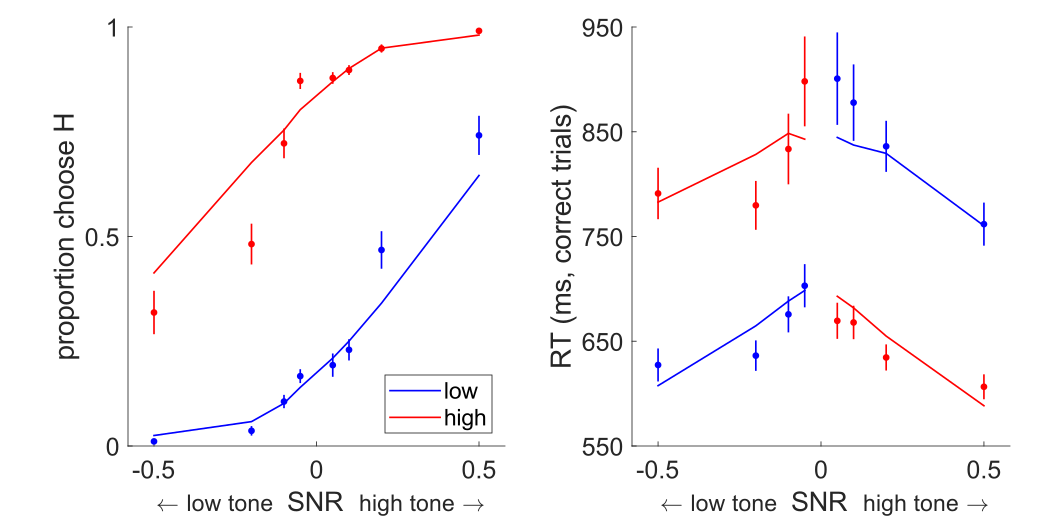

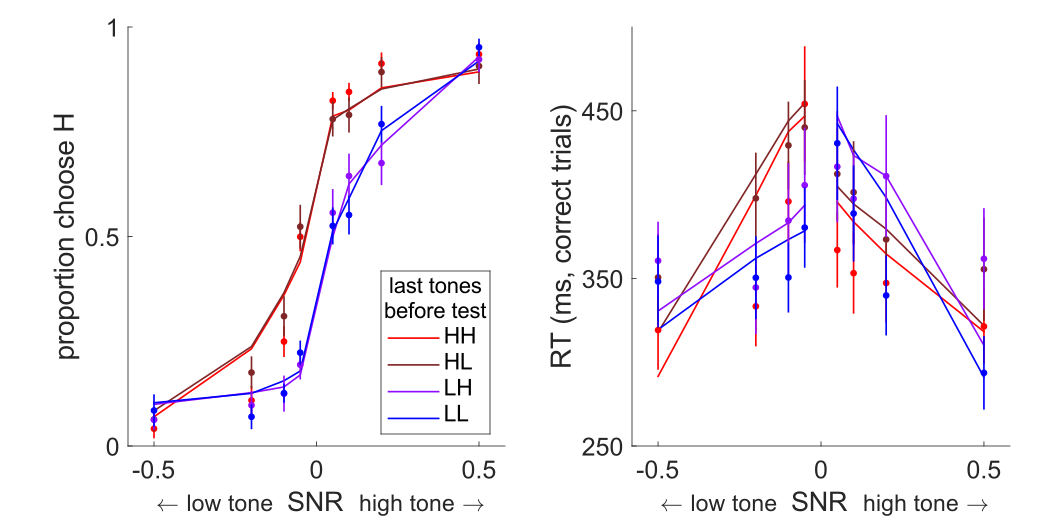

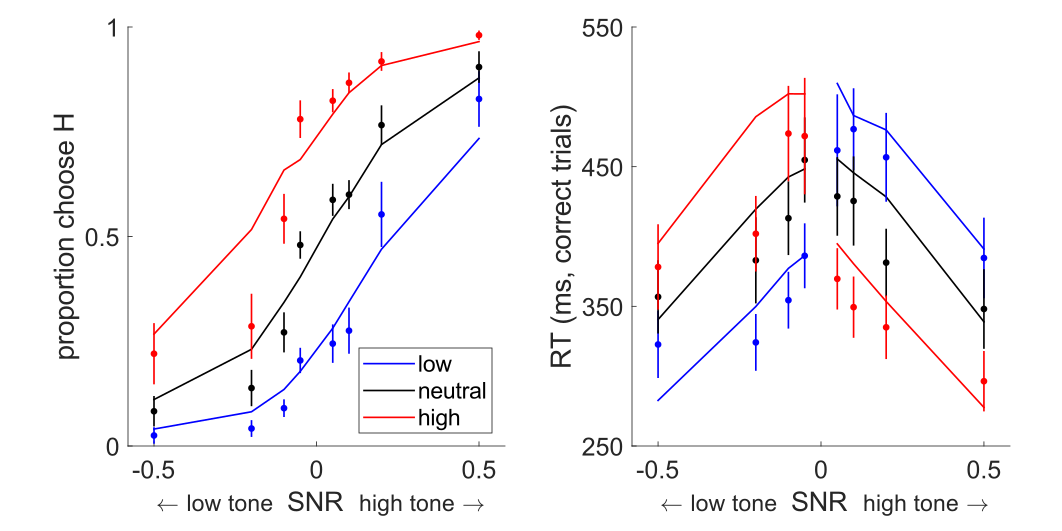

In [61]:
%FINAL

vert=false;
if vert
    this_figdim = [1 1 400 800];
    this_subplot = @(m,n,p) subtightplot(m,n,p,.08,.05,[0.12 0.05]);
else
    this_figdim = [1 1 850 425];
    this_subplot = @(m,n,p) subtightplot(m,n,p,.12,[.16 .05],[0.12 0.05]);
    set(groot,'DefaultAxesFontSize',15)
    set(groot,'DefaultLineLineWidth',1)
    set(groot,'DefaultErrorBarLineWidth',1)
    set(groot,'DefaultErrorBarMarkerSize',12)
    set(groot,'DefaultErrorBarCapSize',0)
end
psycho_xlab = ' \fontsize{14}\leftarrow low tone  \fontsize{16}SNR  \fontsize{14}high tone \rightarrow';
for m=1:height(models_block)
    model_data = read_data_csv(fullfile(GFIT_DATA_DIR,models_block.data{m}));
    SNR = unique(model_data.SNR);
    subj_predicted = readtable(fullfile(GFIT_DIR,models_block.predicted{m}));
    subj_predicted.mean_RT_corr = subj_predicted.mean_RT_corr.*1000;
    try
        this_data = innerjoin(model_data,subj_predicted,'Keys',{'subject','prior','SNR','bias'},'RightVariables',...
            {'mean_chooseH','mean_RT_corr'});
    catch
        %handles priorOnly/pretoneOnly cases
        if models_block.prior(m)==1
            this_data = innerjoin(model_data,subj_predicted,'Keys',{'subject','prior','SNR'},'RightVariables',...
                {'mean_chooseH','mean_RT_corr'});
        else
            this_data = innerjoin(model_data,subj_predicted,'Keys',{'subject','SNR','bias'},'RightVariables',...
                {'mean_chooseH','mean_RT_corr'});
        end
    end
    %%%foo = this_data;
    %%%sum(isnan(this_data.choice01))
    
    if models_block.pretone(m)==1       
        %plot pretone effects 
        psycho_ave_ptm = varfun(@nanmean,this_data,'InputVariables',{'choice01','mean_chooseH'},...
            'GroupingVariables',{'subject','ptC','SNR'});
        psycho_ave_ptm_all = summary_stats(psycho_ave_ptm,{'nanmean_choice01','nanmean_mean_chooseH'},...
            {'ptC','SNR'});
        chrono_ave_ptm = varfun(@nanmean,this_data,'InputVariables',{'RT','mean_RT_corr'},...
            'GroupingVariables',{'subject','ptC','success','SNR'});
        chrono_ave_ptm_all = summary_stats(chrono_ave_ptm,{'nanmean_RT','nanmean_mean_RT_corr'},...
            {'ptC','success','SNR'},1);  

        figure('Position',this_figdim);hold on;
        if vert
            this_subplot(2,1,1)
        else
            this_subplot(1,2,1)
        end
        h_psychm = psycho_plot(psycho_ave_ptm_all,...
            'ptC',mline_style,'mean_nanmean_mean_chooseH',[]);
        [h_psychm.Color] = jet4r{:}; 
        h_psych = psycho_plot(psycho_ave_ptm_all,'ptC','.');
        [h_psych.Color] = jet4r{:}; 
        xlabel(psycho_xlab)
        ylabel('proportion choose H')
        ylim([0 1])
        xlim([-.58 .58])
        yticks([0 .5 1])
        if vert
            title(models_block.title{m},'Interpreter','none')
        end
        %legend(psychpt_leg,'Location','SouthEast')
        psychpt_leg = cellstr(unique(model_data.ptC(~isundefined(model_data.ptC))));
        legendflex(psychpt_leg,'anchor',[5 5],'buffer',[-12,10], ...
            'title',{'\fontsize{13}last tones';'\fontsize{13}before test'});

        if vert
            this_subplot(2,1,2)
        else
            this_subplot(1,2,2)
        end
        hold on;
        h_chronom = chrono_plot(chrono_ave_ptm_all,'ptC',mline_style,'nanmean_nanmean_mean_RT_corr',[],1);
        chrono_color(h_chronom,jet4r)
        h_chrono = chrono_plot(chrono_ave_ptm_all,'ptC','.','nanmean_nanmean_RT','nansem_nanmean_RT',1);
        chrono_color(h_chrono,jet4r) 
        xlabel(psycho_xlab)
        xlim([-.58 .58])
        ylabel('RT (ms, correct trials)')
        title('');
        this_ytx = yticks(gca);
        %yticks(round(linspace(this_ytx(1),this_ytx(end),4)))
        yticks(this_ytx(1):100:this_ytx(end))
    end
    
    if models_block.prior(m)==1
        %plot prior effects per block
        psycho_ave_priorm= varfun(@nanmean,this_data,'InputVariables',{'choice01','mean_chooseH'},...
            'GroupingVariables',{'subject','prior','SNR'});
        psycho_ave_priorm_all = summary_stats(psycho_ave_priorm,{'nanmean_choice01','nanmean_mean_chooseH'},...
            {'prior','SNR'});
        chrono_ave_priorm = varfun(@nanmean,this_data,'InputVariables',{'RT','mean_RT_corr'},...
            'GroupingVariables',{'subject','prior','success','SNR'});
        chrono_ave_priorm_all = summary_stats(chrono_ave_priorm,{'nanmean_RT','nanmean_mean_RT_corr'},...
            {'prior','success','SNR'},1);  
        
        this_psych_color = psych_color(ismember([-2 0 2],psycho_ave_priorm_all.prior));
        this_psych_leg = psych_leg(ismember([-2 0 2],psycho_ave_priorm_all.prior));

        figure('Position',this_figdim);hold on;
        if vert
            this_subplot(2,1,1)
        else
            this_subplot(1,2,1)
        end
        h_psychm = psycho_plot(psycho_ave_priorm_all,...
            'prior',strcat(mline_style,this_psych_color),'mean_nanmean_mean_chooseH',[]);
        h_psych = psycho_plot(psycho_ave_priorm_all,'prior',strcat('.',this_psych_color));
        xlabel(psycho_xlab)
        ylabel('proportion choose H')
        ylim([0 1])
        xlim([-.58 .58])
        yticks([0 .5 1])
        if vert
            title(models_block.title{m},'Interpreter','none')
        end
        legend(this_psych_leg,'Location','SouthEast')

        if vert
            this_subplot(2,1,2)
        else
            this_subplot(1,2,2)
        end
        hold on;
        h_chronom = chrono_plot(chrono_ave_priorm_all,'prior',strcat(mline_style,this_psych_color),...
            'nanmean_nanmean_mean_RT_corr',[],1);
        h_chrono = chrono_plot(chrono_ave_priorm_all,'prior',strcat('.',this_psych_color),...
            'nanmean_nanmean_RT','nansem_nanmean_RT',1);
        xlabel(psycho_xlab)
        xlim([-.58 .58])
        ylabel('RT (ms, correct trials)')
        title('')
        this_ytx = yticks(gca);
        %yticks(round(linspace(this_ytx(1),this_ytx(end),4)))
        yticks(this_ytx(1):100:this_ytx(end))
    end
   
end
if ~vert
    set(groot,'DefaultAxesFontSize','factory')
    set(groot,'DefaultLineLineWidth','factory')
    set(groot,'DefaultErrorBarLineWidth','factory')
    set(groot,'DefaultErrorBarMarkerSize','factory')
    set(groot,'DefaultErrorBarCapSize','factory')

end

### smooth fits
For Josh's edification.

> In read_data_csv (line 16)
> In read_data_csv (line 17)


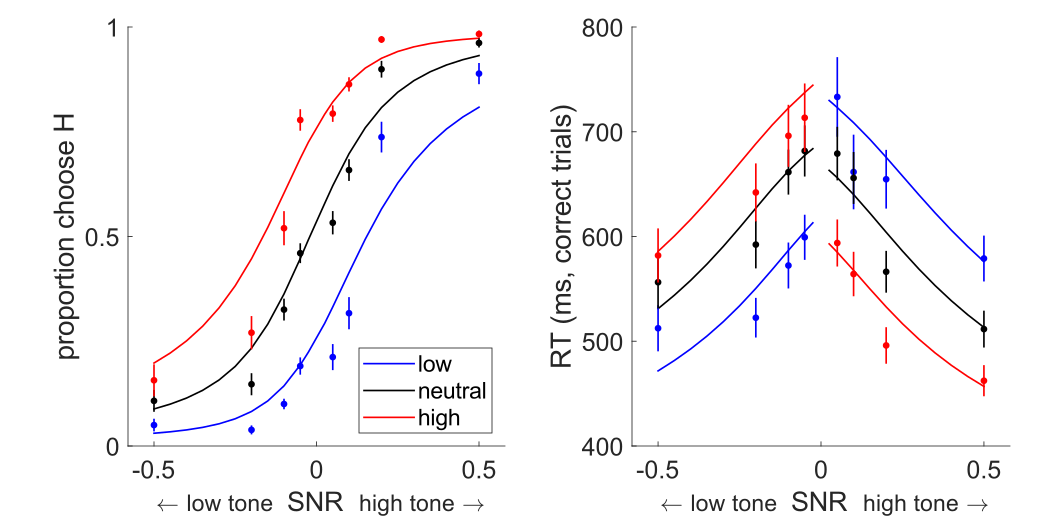

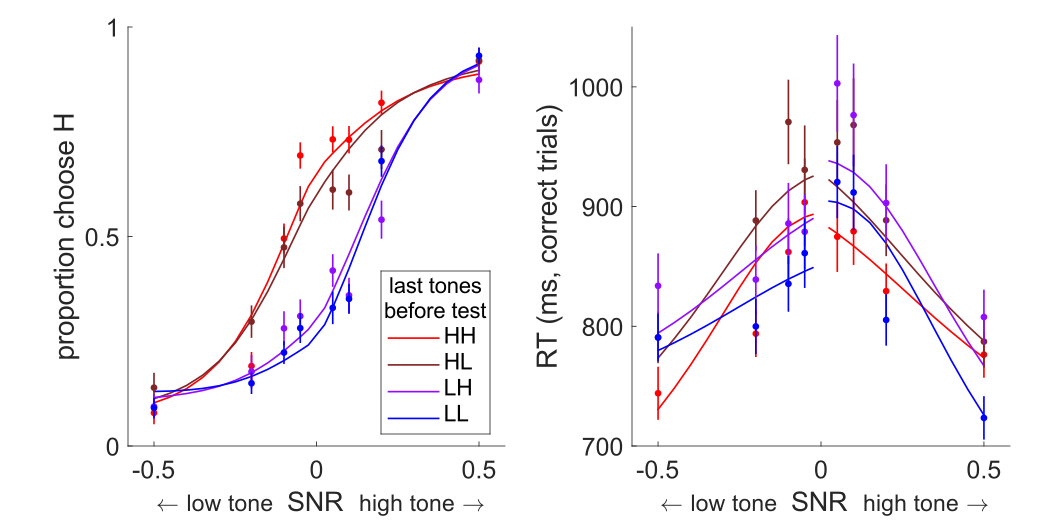

In [65]:
%FINAL

vert=false;
if vert
    this_figdim = [1 1 400 800];
    this_subplot = @(m,n,p) subtightplot(m,n,p,.08,.05,[0.12 0.05]);
else
    this_figdim = [1 1 850 425];
    this_subplot = @(m,n,p) subtightplot(m,n,p,.12,[.16 .05],[0.12 0.05]);
    set(groot,'DefaultAxesFontSize',15)
    set(groot,'DefaultLineLineWidth',1)
    set(groot,'DefaultErrorBarLineWidth',1)
    set(groot,'DefaultErrorBarMarkerSize',12)
    set(groot,'DefaultErrorBarCapSize',0)
end
psycho_xlab = ' \fontsize{14}\leftarrow low tone  \fontsize{16}SNR  \fontsize{14}high tone \rightarrow';
for m=1:2 %height(models_block)
    this_data = read_data_csv(fullfile(GFIT_DATA_DIR,models_block.data{m}));
    %%%sum(isnan(this_data.choice01))
    this_data(isnan(this_data.choice01),:) = []; %remove missing trials
    %%%bar = this_data;
    SNR = unique(model_data.SNR);
    subj_predicted = readtable(fullfile(GFIT_DIR,models_block.predicted_smooth{m}));
    subj_predicted.mean_RT_corr = subj_predicted.mean_RT_corr.*1000;
    subj_predicted.success = ones(height(subj_predicted),1); %not sure this is necessary but going w/ it to change as little as possible

    
    if models_block.pretone(m)==1
        %attach ptC column to predictions
        ptC_vals = unique(this_data(:,{'bias','ptC'}),'rows');
        subj_predicted = join(subj_predicted,ptC_vals,'Keys',{'bias'},'RightVariables',...
            {'ptC'});
            
        %average data effects
        psycho_ave_ptm = varfun(@nanmean,this_data,'InputVariables',{'choice01'},...
            'GroupingVariables',{'subject','ptC','SNR'});
        psycho_ave_ptm_all = summary_stats(psycho_ave_ptm,{'nanmean_choice01'},...
            {'ptC','SNR'});
        chrono_ave_ptm = varfun(@nanmean,this_data,'InputVariables',{'RT'},...
            'GroupingVariables',{'subject','ptC','success','SNR'});
        chrono_ave_ptm_all = summary_stats(chrono_ave_ptm,{'nanmean_RT'},...
            {'ptC','success','SNR'},1);  
            
        %average predicted effects
        psycho_ave_ptmp = varfun(@nanmean,subj_predicted,'InputVariables',{'mean_chooseH'},...
            'GroupingVariables',{'subject','ptC','SNR'});
        psycho_ave_ptmp_all = summary_stats(psycho_ave_ptmp,{'nanmean_mean_chooseH'},...
            {'ptC','SNR'});
        chrono_ave_ptmp = varfun(@nanmean,subj_predicted,'InputVariables',{'mean_RT_corr'},...
            'GroupingVariables',{'subject','ptC','success','SNR'});
        chrono_ave_ptmp_all = summary_stats(chrono_ave_ptmp,{'nanmean_mean_RT_corr'},...
            {'ptC','success','SNR'},1);  
            

        figure('Position',this_figdim);hold on;
        if vert
            this_subplot(2,1,1)
        else
            this_subplot(1,2,1)
        end
        h_psychm = psycho_plot(psycho_ave_ptmp_all,...
            'ptC',mline_style,'mean_nanmean_mean_chooseH',[]);
        [h_psychm.Color] = jet4r{:}; 
        h_psych = psycho_plot(psycho_ave_ptm_all,'ptC','.');
        [h_psych.Color] = jet4r{:}; 
        xlabel(psycho_xlab)
        ylabel('proportion choose H')
        ylim([0 1])
        xlim([-.58 .58])
        yticks([0 .5 1])
        if vert
            title(models_block.title{m},'Interpreter','none')
        end
        %legend(psychpt_leg,'Location','SouthEast')
        psychpt_leg = cellstr(unique(model_data.ptC(~isundefined(model_data.ptC))));
        legendflex(psychpt_leg,'anchor',[5 5],'buffer',[-12,10], ...
            'title',{'\fontsize{13}last tones';'\fontsize{13}before test'});

        if vert
            this_subplot(2,1,2)
        else
            this_subplot(1,2,2)
        end
        hold on;
        h_chronom = chrono_plot(chrono_ave_ptmp_all,'ptC',mline_style,'nanmean_nanmean_mean_RT_corr',[],1);
        chrono_color(h_chronom,jet4r)
        h_chrono = chrono_plot(chrono_ave_ptm_all,'ptC','.','nanmean_nanmean_RT','nansem_nanmean_RT',1);
        chrono_color(h_chrono,jet4r) 
        xlabel(psycho_xlab)
        xlim([-.58 .58])
        ylabel('RT (ms, correct trials)')
        title('');
        this_ytx = yticks(gca);
        %yticks(round(linspace(this_ytx(1),this_ytx(end),4)))
        yticks(this_ytx(1):100:this_ytx(end))
    end
    
    if models_block.prior(m)==1
        %average data effects
        psycho_ave_priorm= varfun(@nanmean,this_data,'InputVariables',{'choice01'},...
            'GroupingVariables',{'subject','prior','SNR'});
        psycho_ave_priorm_all = summary_stats(psycho_ave_priorm,{'nanmean_choice01'},...
            {'prior','SNR'});
        chrono_ave_priorm = varfun(@nanmean,this_data,'InputVariables',{'RT'},...
            'GroupingVariables',{'subject','prior','success','SNR'});
        chrono_ave_priorm_all = summary_stats(chrono_ave_priorm,{'nanmean_RT'},...
            {'prior','success','SNR'},1);  
            
        %average predicted effects
        psycho_ave_priormp= varfun(@nanmean,subj_predicted,'InputVariables',{'mean_chooseH'},...
            'GroupingVariables',{'subject','prior','SNR'});
        psycho_ave_priormp_all = summary_stats(psycho_ave_priormp,{'nanmean_mean_chooseH'},...
            {'prior','SNR'});
        chrono_ave_priormp = varfun(@nanmean,subj_predicted,'InputVariables',{'mean_RT_corr'},...
            'GroupingVariables',{'subject','prior','success','SNR'});
        chrono_ave_priormp_all = summary_stats(chrono_ave_priormp,{'nanmean_mean_RT_corr'},...
            {'prior','success','SNR'},1);  
        
        this_psych_color = psych_color(ismember([-2 0 2],psycho_ave_priorm_all.prior));
        this_psych_leg = psych_leg(ismember([-2 0 2],psycho_ave_priorm_all.prior));

        figure('Position',this_figdim);hold on;
        if vert
            this_subplot(2,1,1)
        else
            this_subplot(1,2,1)
        end
        h_psychm = psycho_plot(psycho_ave_priormp_all,...
            'prior',strcat(mline_style,this_psych_color),'mean_nanmean_mean_chooseH',[]);
        h_psych = psycho_plot(psycho_ave_priorm_all,'prior',strcat('.',this_psych_color));
        xlabel(psycho_xlab)
        ylabel('proportion choose H')
        ylim([0 1])
        xlim([-.58 .58])
        yticks([0 .5 1])
        if vert
            title(models_block.title{m},'Interpreter','none')
        end
        legend(this_psych_leg,'Location','SouthEast')

        if vert
            this_subplot(2,1,2)
        else
            this_subplot(1,2,2)
        end
        hold on;
        h_chronom = chrono_plot(chrono_ave_priormp_all,'prior',strcat(mline_style,this_psych_color),...
            'nanmean_nanmean_mean_RT_corr',[],1);
        h_chrono = chrono_plot(chrono_ave_priorm_all,'prior',strcat('.',this_psych_color),...
            'nanmean_nanmean_RT','nansem_nanmean_RT',1);
        xlabel(psycho_xlab)
        xlim([-.58 .58])
        ylabel('RT (ms, correct trials)')
        title('')
        this_ytx = yticks(gca);
        %yticks(round(linspace(this_ytx(1),this_ytx(end),4)))
        yticks(this_ytx(1):100:this_ytx(end))
    end
   
end
if ~vert
    set(groot,'DefaultAxesFontSize','factory')
    set(groot,'DefaultLineLineWidth','factory')
    set(groot,'DefaultErrorBarLineWidth','factory')
    set(groot,'DefaultErrorBarMarkerSize','factory')
    set(groot,'DefaultErrorBarCapSize','factory')

end

## interaction plots

> In read_data_csv (line 16)
> In read_data_csv (line 17)


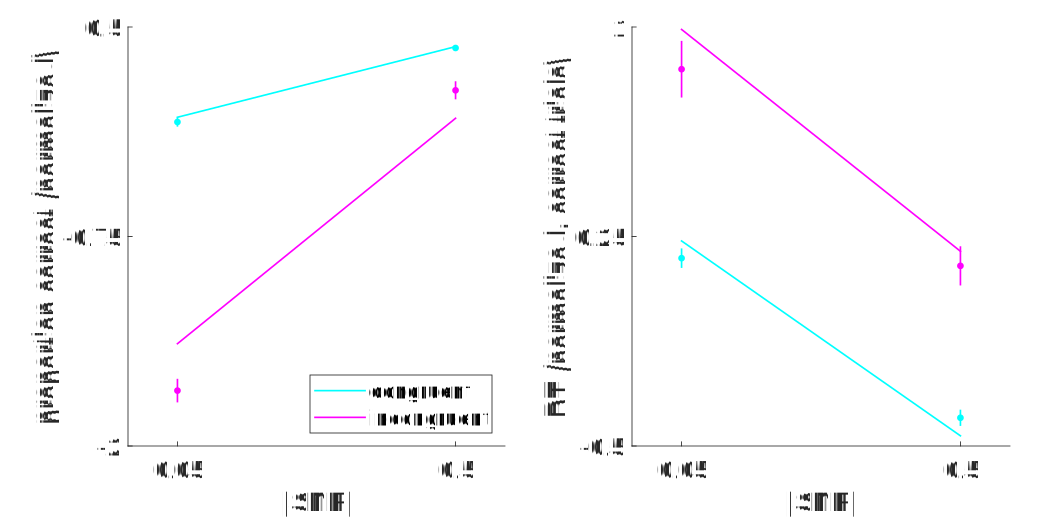

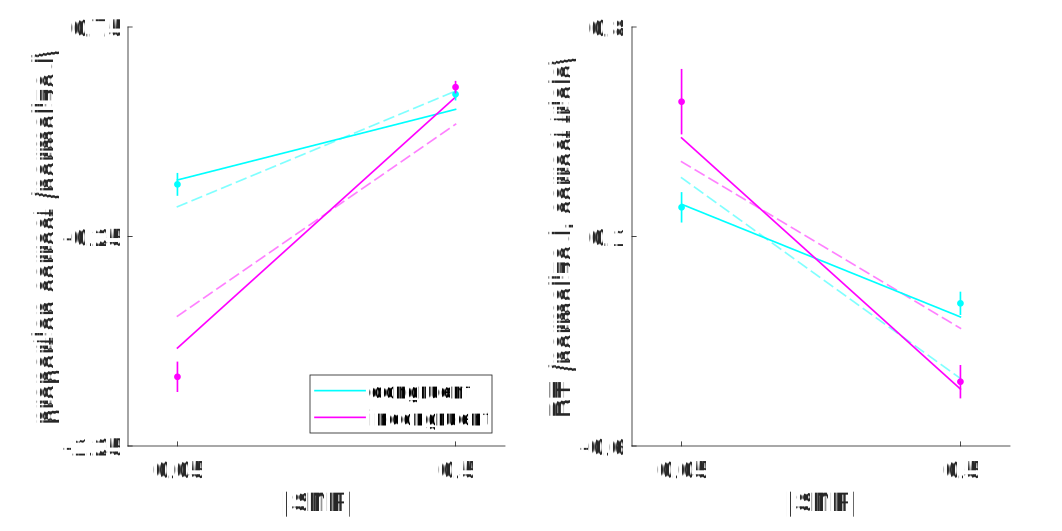

In [2]:
%interaction plot as func of congruent/incongruent

%FINAL

normalize = true;

line_specs = {'c','m'};
line_specsb = {[0 1 1 0.5],[1 0 1 0.5]};

this_figdim = [1 1 850 425];
this_subplot = @(m,n,p) subtightplot(m,n,p,.12,[.16 .05],[0.12 0.05]);
set(groot,'DefaultAxesFontSize',15)
set(groot,'DefaultLineLineWidth',1)
set(groot,'DefaultErrorBarLineWidth',1)
set(groot,'DefaultErrorBarMarkerSize',12)
set(groot,'DefaultErrorBarCapSize',0)
psycho_xlab = '\fontsize{16}|SNR|';
psycho_int_ylab = 'proportion correct (normalized)';
chrono_int_ylab = 'RT (normalized, correct trials)';
con_leg = {'congruent','incongruent'};
for m=1:2
    model_data = read_data_csv(fullfile(GFIT_DATA_DIR,models_block.data{m}));
    SNR = unique(model_data.SNR);
    subj_predicted = readtable(fullfile(GFIT_DIR,models_block.predicted{m}));
    subj_predicted.mean_RT_corr = subj_predicted.mean_RT_corr.*1000;
    
    %restrict data to lowest/highest SNR
    model_data = model_data(ismember(abs(model_data.SNR),[0.05,0.5]),:);
    model_data.aSNR = abs(model_data.SNR);
    
    
    try
        this_data = innerjoin(model_data,subj_predicted,'Keys',{'subject','prior','SNR','bias'},'RightVariables',...
            {'mean_chooseH','mean_RT_corr'});
    catch
        %handles priorOnly/pretoneOnly cases
        if models_block.prior(m)==1
            this_data = innerjoin(model_data,subj_predicted,'Keys',{'subject','prior','SNR'},'RightVariables',...
                {'mean_chooseH','mean_RT_corr'});
        else
            this_data = innerjoin(model_data,subj_predicted,'Keys',{'subject','SNR','bias'},'RightVariables',...
                {'mean_chooseH','mean_RT_corr'});
        end
    end

    %in order to code choices in terms of congruence, we need to flip the isH==0 choices 
    %(essentially changing it to correct/incorrect coding)
    this_data = this_data(~isnan(this_data.choice01),:);
    this_data.choice01 = this_data.success; %this is hacky but is same as flipping the isH==0 choices. 
    this_data.mean_chooseH(this_data.isH==0) = 1-this_data.mean_chooseH(this_data.isH==0);
    
    if models_block.pretone(m)==1       
        %plot pretone effects (restrict to HH/LL)
       
        this_data = this_data(ismember(this_data.ptC,{'HH','LL'}),:);
        this_data.ptC = removecats(this_data.ptC);
        
        this_data.congruent = 1-double((this_data.isH == 1 & this_data.ptC=='HH') | ...
            (this_data.isH==0 & this_data.ptC=='LL')); %need to reverse code this for ordering in graph
            
        if normalize
            norms = [];
            this_subj = unique(this_data.subject);
            for i=1:length(this_subj)
                %normalize choice
                [this_zchoice,this_muC,this_sigmaC] = zscore(this_data.choice01(strcmp(this_data.subject,this_subj{i})));
                this_data.choice01(strcmp(this_data.subject,this_subj{i})) = this_zchoice;
                this_data.mean_chooseH(strcmp(this_data.subject,this_subj{i})) = ...
                    (this_data.mean_chooseH(strcmp(this_data.subject,this_subj{i})) - this_muC) ./ this_sigmaC;
                
                %normalize RT
                [this_zRT,this_muRT,this_sigmaRT] = zscore(this_data.RT(strcmp(this_data.subject,this_subj{i})));
                this_data.RT(strcmp(this_data.subject,this_subj{i})) = this_zRT;
                this_data.mean_RT_corr(strcmp(this_data.subject,this_subj{i})) = ...
                    (this_data.mean_RT_corr(strcmp(this_data.subject,this_subj{i})) - this_muRT) ./ this_sigmaRT;
                
                %save norms for normalizing bias only fits...urg
                this_norm = table(this_subj(i),this_muC,this_sigmaC,this_muRT,this_sigmaRT,...
                    'VariableNames',{'subject','muC','sigmaC','muRT','sigmaRT'});
                norms = [norms;this_norm];
            end
        end
        
        psycho_ave_ptm = varfun(@nanmean,this_data,...
            'InputVariables',{'choice01','mean_chooseH'},...
            'GroupingVariables',{'subject','congruent','aSNR'});
        psycho_ave_ptm_all = summary_stats(psycho_ave_ptm,{'nanmean_choice01','nanmean_mean_chooseH'},...
            {'congruent','aSNR'});
        chrono_ave_ptm = varfun(@nanmean,this_data,'InputVariables',{'RT','mean_RT_corr'},...
            'GroupingVariables',{'subject','congruent','success','aSNR'});
        chrono_ave_ptm_all = summary_stats(chrono_ave_ptm,{'nanmean_RT','nanmean_mean_RT_corr'},...
            {'congruent','success','aSNR'},1);  
            
        % separately load in and plot bias-only model (this code gets very redundant...:-())
        if strcmp(models_block.title{m},'pretoneOnly')
            biasOnly = readtable(fullfile(GFIT_DIR,models_pt.predicted{strcmp(models_pt.title,'bias only')}));
            biasOnly.Properties.VariableNames({'mean_chooseH','mean_RT_corr'}) = {'mean_chooseHb','mean_RT_corrb'};
            biasOnly.mean_RT_corrb = biasOnly.mean_RT_corrb.*1000;
            biasOnly.mean_chooseHb(biasOnly.isH==0) = 1-biasOnly.mean_chooseHb(biasOnly.isH==0);
            %head(biasOnly)
            this_data = innerjoin(this_data,biasOnly,'Keys',{'subject','SNR','bias'},'RightVariables',...
                {'mean_chooseHb','mean_RT_corrb'});
            
            if normalize
                for i=1:length(this_subj)
                    this_muC = norms.muC(strcmp(norms.subject,this_subj{i}));
                    this_sigmaC = norms.sigmaC(strcmp(norms.subject,this_subj{i}));
                    this_data.mean_chooseHb(strcmp(this_data.subject,this_subj{i})) = ...
                        (this_data.mean_chooseHb(strcmp(this_data.subject,this_subj{i})) - this_muC) ./ this_sigmaC;
                        
                    this_muRT = norms.muRT(strcmp(norms.subject,this_subj{i}));
                    this_sigmaRT = norms.sigmaRT(strcmp(norms.subject,this_subj{i}));
                    this_data.mean_RT_corrb(strcmp(this_data.subject,this_subj{i})) = ...
                        (this_data.mean_RT_corrb(strcmp(this_data.subject,this_subj{i})) - this_muRT) ./ this_sigmaRT;
                end
            end
                
            psycho_ave_b = varfun(@nanmean,this_data,...
                'InputVariables',{'mean_chooseHb'},...
                'GroupingVariables',{'subject','congruent','aSNR'});
            psycho_ave_b_all = summary_stats(psycho_ave_b,{'nanmean_mean_chooseHb'},...
                {'congruent','aSNR'});
            chrono_ave_b = varfun(@nanmean,this_data,'InputVariables',{'mean_RT_corrb'},...
                'GroupingVariables',{'subject','congruent','success','aSNR'});
            chrono_ave_b_all = summary_stats(chrono_ave_b,{'nanmean_mean_RT_corrb'},...
                {'congruent','success','aSNR'},1);  
        end

        figure('Position',this_figdim);hold on;
        this_subplot(1,2,1)
        h_psychmb = psycho_plot(psycho_ave_b_all,...
            'congruent','--','mean_nanmean_mean_chooseHb',[],[],'aSNR');
        [h_psychmb.Color] = line_specsb{:}; 
        h_psychm = psycho_plot(psycho_ave_ptm_all,...
            'congruent',mline_style,'mean_nanmean_mean_chooseH',[],[],'aSNR');
        [h_psychm.Color] = line_specs{:}; 
        h_psych = psycho_plot(psycho_ave_ptm_all,'congruent','.','mean_nanmean_choice01','sem_nanmean_choice01',[],'aSNR');
        [h_psych.Color] = line_specs{:}; 
        xlabel(psycho_xlab)
        ylabel(psycho_int_ylab)
        if normalize
            ylim([-1.25 0.75])
            yticks([-1.25 -0.25 0.75])
        else
            ylim([0 1])
            yticks([0 .5 1])
        end
        xticks([0.05 0.5])
        xlim([-.03 .58])
        legend(h_psychm,con_leg,'Location','SouthEast')
        %psychpt_leg = cellstr(unique(this_data.ptC(~isundefined(this_data.ptC))));
        %legendflex(psychpt_leg,'anchor',[5 5],'buffer',[-12,10], ...
        %    'title',{'\fontsize{13}last tones';'\fontsize{13}before test'});

        this_subplot(1,2,2)
        hold on;
        h_chronob = chrono_plot(chrono_ave_b_all,'congruent','--','nanmean_nanmean_mean_RT_corrb',[],1,[],[],'aSNR');
        [h_chronob.Color] = line_specsb{:};
        h_chronom = chrono_plot(chrono_ave_ptm_all,'congruent',mline_style,'nanmean_nanmean_mean_RT_corr',[],1,[],[],'aSNR');
        [h_chronom.Color] = line_specs{:};
        h_chrono = chrono_plot(chrono_ave_ptm_all,'congruent','.','nanmean_nanmean_RT','nansem_nanmean_RT',1,[],[],'aSNR');
        chrono_color(h_chrono,line_specs)
        xlabel(psycho_xlab)
        %xlim([-.58 .58])
        ylabel(chrono_int_ylab)
        title('');
        if normalize
            yticks([-0.6 .1 .8]);
        else
            this_ytx = yticks(gca);
            %%%yticks(this_ytx(1):100:this_ytx(end))
        end
        xticks([0.05 0.5]);
        xlim([-.03 .58])
    end
    
    if models_block.prior(m)==1
        %restrict to low/high
        this_data(this_data.prior==0,:) = [];
        
        this_data.congruent = 1-double((this_data.isH == 1 & this_data.prior==2) | ...
            (this_data.isH==0 & this_data.prior==-2)); %need to reverse code this for ordering in graph
        %choicefoo = this_data.choice01;
        %choicefoo(this_data.isH==0) = double(~choicefoo(this_data.isH==0));
        %isequal(choicefoo,this_data.success)
        
        if normalize
            norms = [];
            this_subj = unique(this_data.subject);
            for i=1:length(this_subj)
                %normalize choice
                [this_zchoice,this_muC,this_sigmaC] = zscore(this_data.choice01(strcmp(this_data.subject,this_subj{i})));
                this_data.choice01(strcmp(this_data.subject,this_subj{i})) = this_zchoice;
                this_data.mean_chooseH(strcmp(this_data.subject,this_subj{i})) = ...
                    (this_data.mean_chooseH(strcmp(this_data.subject,this_subj{i})) - this_muC) ./ this_sigmaC;
                
                %normalize RT
                [this_zRT,this_muRT,this_sigmaRT] = zscore(this_data.RT(strcmp(this_data.subject,this_subj{i})));
                this_data.RT(strcmp(this_data.subject,this_subj{i})) = this_zRT;
                this_data.mean_RT_corr(strcmp(this_data.subject,this_subj{i})) = ...
                    (this_data.mean_RT_corr(strcmp(this_data.subject,this_subj{i})) - this_muRT) ./ this_sigmaRT;
                
                %save norms for normalizing bias only fits...urg
                %this_norm = table(this_subj(i),this_muC,this_sigmaC,this_muRT,this_sigmaRT,...
                %    'VariableNames',{'subject','muC','sigmaC','muRT','sigmaRT'});
                %norms = [norms;this_norm];
            end
        end
        
        %plot prior effects per block
        psycho_ave_priorm= varfun(@nanmean,this_data,'InputVariables',{'choice01','mean_chooseH'},...
            'GroupingVariables',{'subject','congruent','aSNR'});
        psycho_ave_priorm_all = summary_stats(psycho_ave_priorm,{'nanmean_choice01','nanmean_mean_chooseH'},...
            {'congruent','aSNR'});
        chrono_ave_priorm = varfun(@nanmean,this_data,'InputVariables',{'RT','mean_RT_corr'},...
            'GroupingVariables',{'subject','congruent','success','aSNR'});
        chrono_ave_priorm_all = summary_stats(chrono_ave_priorm,{'nanmean_RT','nanmean_mean_RT_corr'},...
            {'congruent','success','aSNR'},1);  
        

        
        %this_psych_color = psych_color(ismember([-2 0 2],psycho_ave_priorm_all.prior));
        %this_psych_leg = psych_leg(ismember([-2 0 2],psycho_ave_priorm_all.prior));

        figure('Position',this_figdim);hold on;
        this_subplot(1,2,1)
        h_psychm = psycho_plot(psycho_ave_priorm_all,...
            'congruent',strcat(mline_style,line_specs),'mean_nanmean_mean_chooseH',[],[],'aSNR');
        h_psych = psycho_plot(psycho_ave_priorm_all,'congruent',strcat('.',line_specs),'mean_nanmean_choice01',...
            'sem_nanmean_choice01',[],'aSNR');
        xlabel(psycho_xlab)
        ylabel(psycho_int_ylab)

        if normalize
            ylim([-2 0.5])
            yticks([-2 -0.75 0.5])
        else
            ylim([0 1])
            yticks([0 .5 1])
        end
        xticks([0.05 0.5])
        xlim([-.03 .58])
        legend(con_leg,'Location','SouthEast')

        this_subplot(1,2,2)
        hold on;
        h_chronom = chrono_plot(chrono_ave_priorm_all,'congruent',strcat(mline_style,line_specs),...
            'nanmean_nanmean_mean_RT_corr',[],1,[],[],'aSNR');
        h_chrono = chrono_plot(chrono_ave_priorm_all,'congruent',strcat('.',line_specs),...
            'nanmean_nanmean_RT','nansem_nanmean_RT',1,[],[],'aSNR');
        xlabel(psycho_xlab)
        ylabel(chrono_int_ylab)
        title('')
        if normalize
            yticks([-0.5 0.25 1])
        else
            this_ytx = yticks(gca);
            yticks(this_ytx(1):100:this_ytx(end))
        end
        xlim([-.03 .58])
        xticks([0.05 0.5]);
    end
   
end

set(groot,'DefaultAxesFontSize','factory')
set(groot,'DefaultLineLineWidth','factory')
set(groot,'DefaultErrorBarLineWidth','factory')
set(groot,'DefaultErrorBarMarkerSize','factory')
set(groot,'DefaultErrorBarCapSize','factory')

# model comparison
### priorOnly


In [3]:
%FINAL

lle_pc = table();
for i=1:height(models_pc)
    this_lle = readtable(fullfile(GFIT_DIR,models_pc.lle{i}));
    lle_pc = [lle_pc; this_lle];
    clear this_lle
end


lle_pc_ave =

  3x9 table

       model       nparams    GroupCount    mean_nlle    mean_aic    std_nlle    std_aic    sem_nlle    sem_aic
    ___________    _______    __________    _________    ________    ________    _______    ________    _______

    {'m0int'  }       6           49         -39.001     -66.001      238.94     477.88      34.134     68.269 
    {'m0intlb'}       7           49          -81.91     -149.82      243.72     487.45      34.818     69.635 
    {'m3lb'   }      11           49         -144.64     -267.28      246.35     492.69      35.192     70.385 


delta_AIC =

  -83.8189
 -117.4586



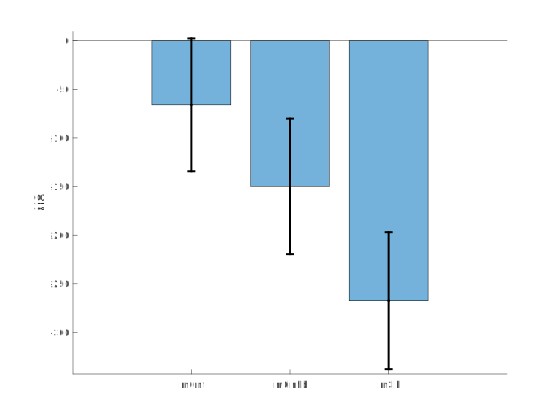

In [4]:
%FINAL

lle_pc_ave = summary_stats(lle_pc,{'nlle','aic'},{'model','nparams'})

barplot(lle_pc_ave.mean_aic,lle_pc_ave.sem_aic,'xticklabel',lle_pc_ave.model,'ylabel','AIC');
ylim([min(lle_pc_ave.mean_aic) - max(lle_pc_ave.sem_aic)-5,...
    max(lle_pc_ave.mean_aic) + max(lle_pc_ave.sem_aic)+5])
delta_AIC = diff(lle_pc_ave.mean_aic)

---
Date: 10-Nov-2021 14:15:32
VB converged in 5 iterations (took ~4 sec).
Dimensions:
     - subjects: n=49
     - models: K=3
Posterior probabilities:
     - RFX: p(H1|y)= 1.000
     - null: p(H0|y)= 0.000

ans =

  3x2 table

       model          pep    
    ___________    __________

    {'m0int'  }    1.5412e-22
    {'m0intlb'}    1.5412e-22
    {'m3lb'   }             1



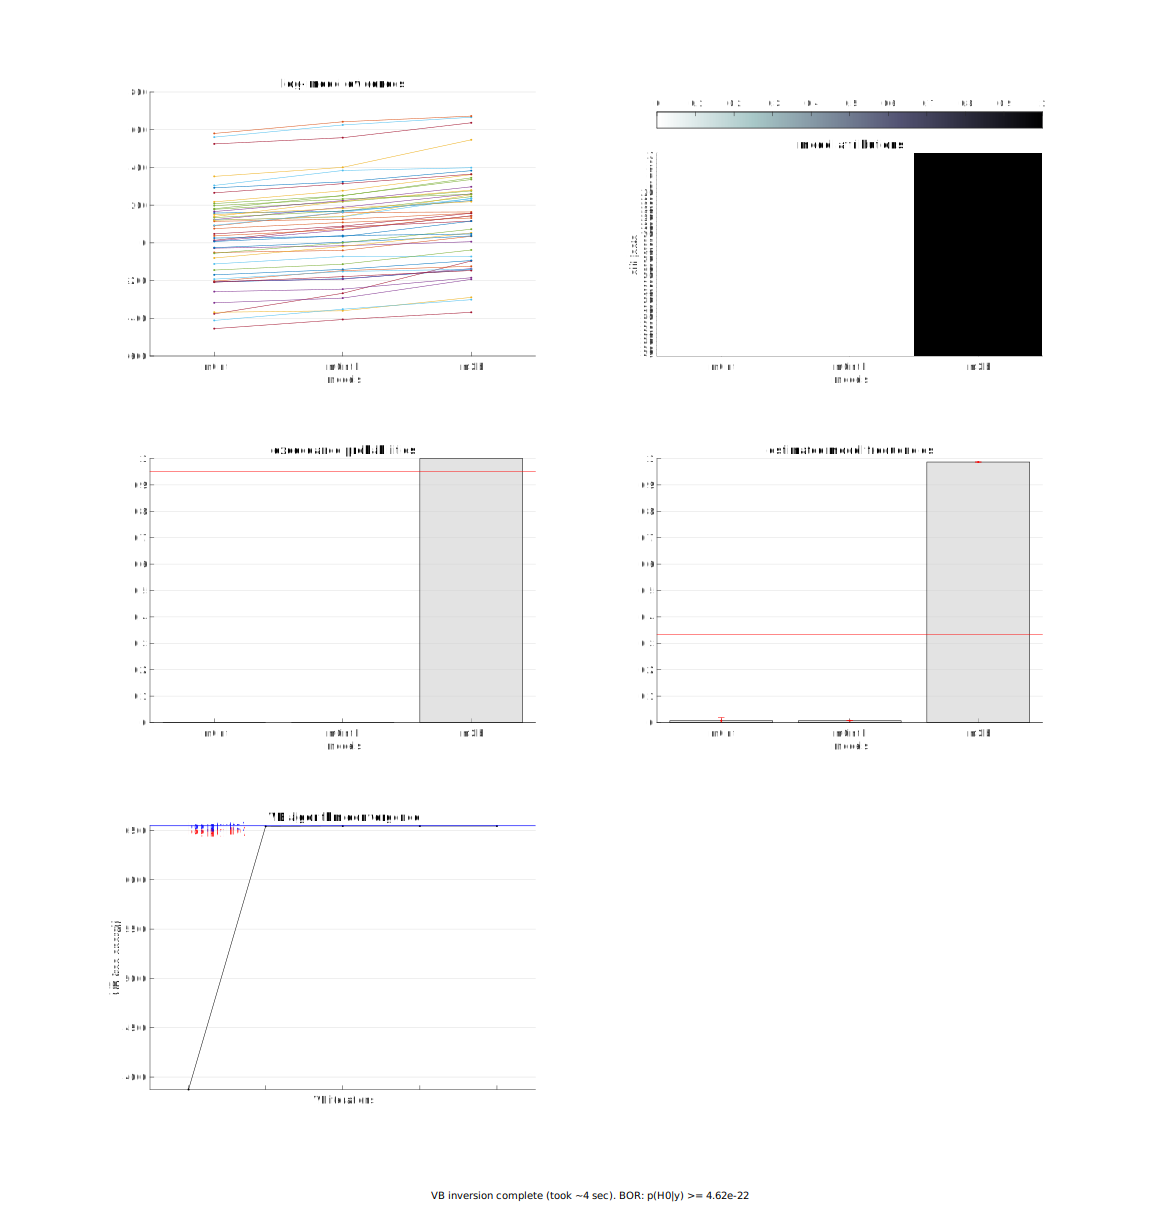

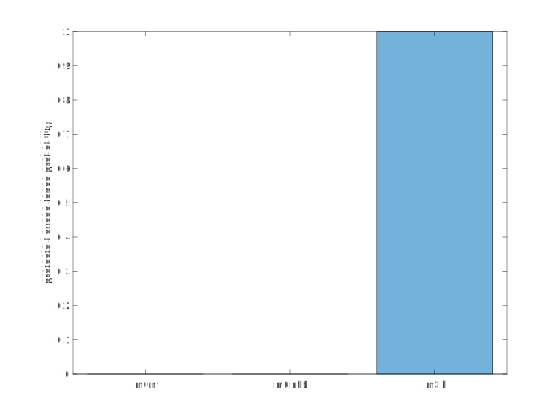

In [5]:
%FINAL

[~,out] = do_BMC(lle_pc);

lle_pc_sum = varfun(@sum,lle_pc,'InputVariables',{'nlle','aic'},...
    'GroupingVariables',{'model','nparams'});
    
out_table = table(out.options.modelNames',out.ep',out.PEP',out.Ef,...
    'VariableNames',{'model','ep','pep','Ef'});

%lle_pc_sum.ep = out.ep'; %exceedanc pr
%lle_pc_sum.pep = out.PEP'; %protected ep
%lle_pc_sum.Ef = out.Ef; %posterior mean of estimated model frequency

lle_pc_sum = join(lle_pc_sum,out_table,'Keys','model');

%plot protected exceedance probabilities
figure();bar(categorical(lle_pc_sum.model),lle_pc_sum.pep)
%xticklabels(lle_pc.model)
ylabel('protected exceedance probability')
lle_pc_sum(:,{'model','pep'})

### pretoneOnly

In [9]:
%FINAL

lle_pt = table();
for i=1:height(models_pt)
    this_lle = readtable(fullfile(GFIT_DIR,models_pt.lle{i}));
    lle_pt = [lle_pt; this_lle];
    clear this_lle
end



lle_pt_ave =

  4x9 table

       model       nparams    GroupCount    mean_nlle    mean_aic    std_nlle    std_aic    sem_nlle    sem_aic
    ___________    _______    __________    _________    ________    ________    _______    ________    _______

    {'m0int'  }       6           45         99.759       211.52      137.32     274.65      20.471     40.942 
    {'m0intlb'}       7           45         59.643       133.29      132.88     265.77      19.809     39.618 
    {'m14'    }      14           45         12.009       52.018      142.78     285.56      21.284     42.568 
    {'m17'    }      11           45         27.425       76.849      137.61     275.22      20.514     41.027 


delta_AIC =

  -78.2312
  -81.2687
   24.8313



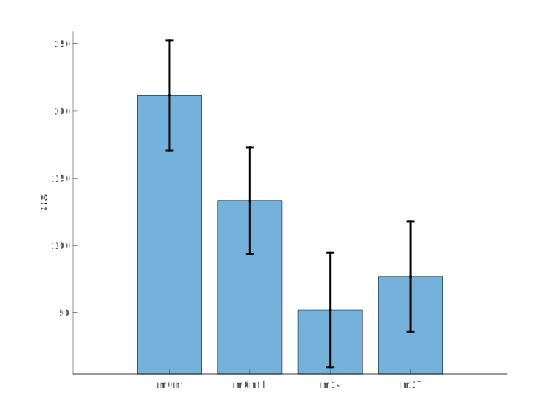

In [10]:
%FINAL

lle_pt_ave = summary_stats(lle_pt,{'nlle','aic'},{'model','nparams'})

barplot(lle_pt_ave.mean_aic,lle_pt_ave.sem_aic,'xticklabel',lle_pt_ave.model,'ylabel','AIC');
ylim([min(lle_pt_ave.mean_aic) - max(lle_pt_ave.sem_aic)-5,...
    max(lle_pt_ave.mean_aic) + max(lle_pt_ave.sem_aic)+5])
delta_AIC = diff(lle_pt_ave.mean_aic)

---
Date: 10-Nov-2021 14:18:48
VB converged in 27 iterations (took ~9 sec).
Dimensions:
     - subjects: n=45
     - models: K=4
Posterior probabilities:
     - RFX: p(H1|y)= 1.000
     - null: p(H0|y)= 0.000

ans =

  4x2 table

       model          pep    
    ___________    __________

    {'m0int'  }    8.7543e-16
    {'m0intlb'}    8.7543e-16
    {'m14'    }             1
    {'m17'    }    8.7543e-16



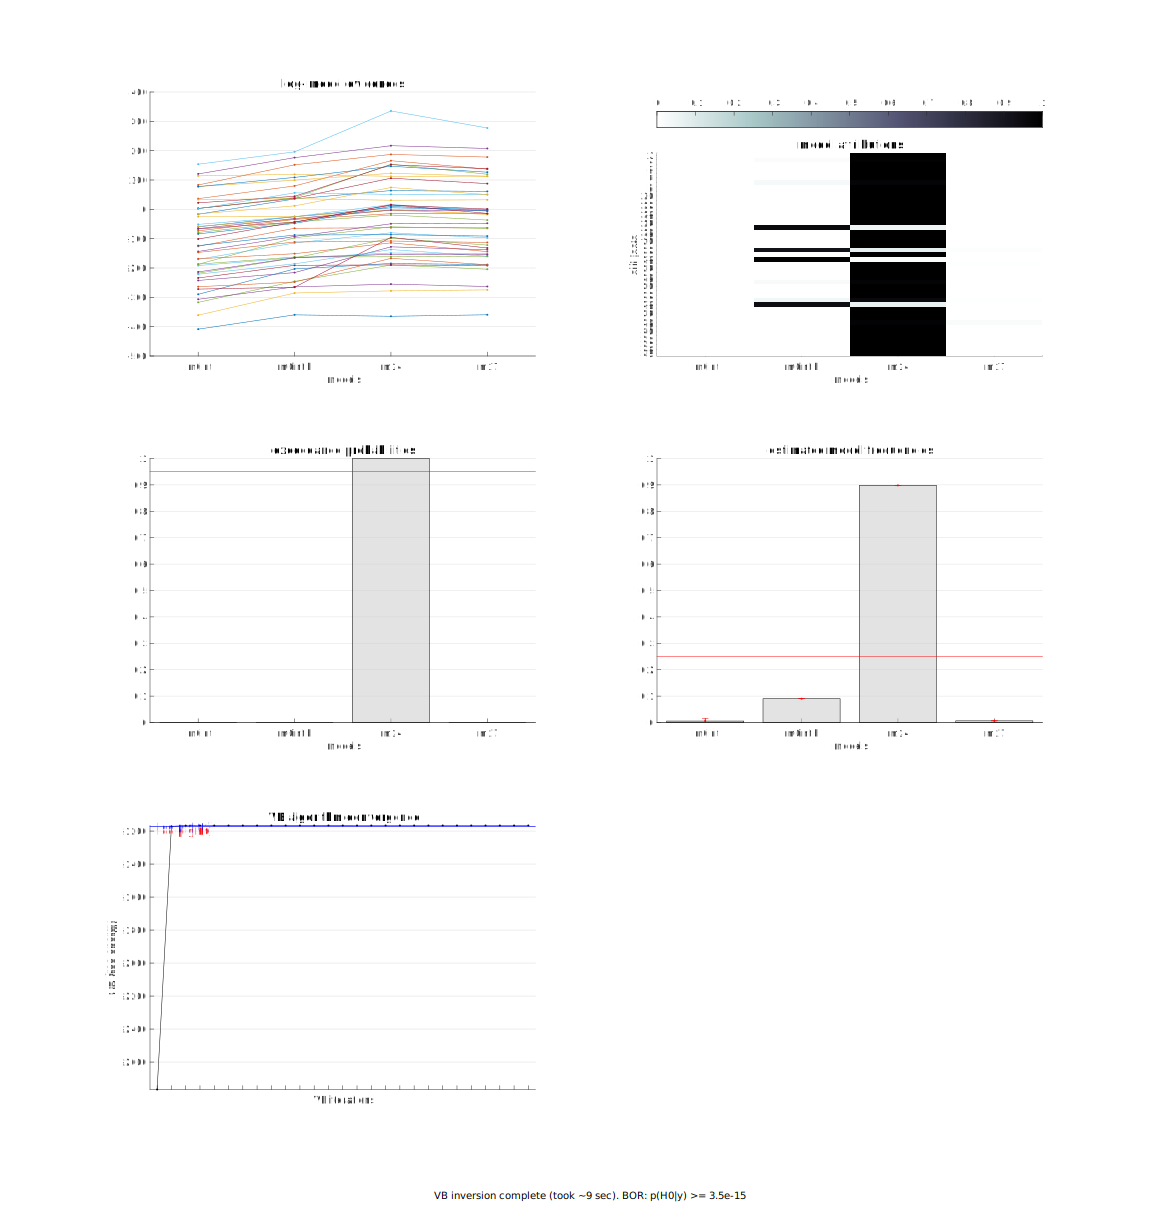

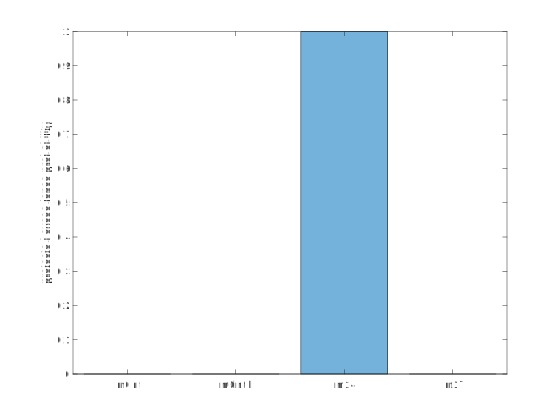

In [11]:
%FINAL

[~,out] = do_BMC(lle_pt);

lle_pt_sum = varfun(@sum,lle_pt,'InputVariables',{'nlle','aic'},...
    'GroupingVariables',{'model','nparams'});
    
out_table = table(out.options.modelNames',out.ep',out.PEP',out.Ef,...
    'VariableNames',{'model','ep','pep','Ef'});

%lle_pt_sum.ep = out.ep'; %exceedanc pr
%lle_pt_sum.pep = out.PEP'; %protected ep
%lle_pt_sum.Ef = out.Ef; %posterior mean of estimated model frequency

lle_pt_sum = join(lle_pt_sum,out_table,'Keys','model');

%plot protected exceedance probabilities
figure();bar(categorical(lle_pt_sum.model),lle_pt_sum.pep)
%xticklabels(lle_pt.model)
ylabel('protected exceedance probability')

lle_pt_sum(:,{'model','pep'})